**Assignment 04**

Reinforcement Learning

**Name**:Abhishek Patel

**Enrollment No**: 23565001

**Dept**: MFS-AI

**email**: abhishek_p@mfs.iitr.ac.in

#Code:

In [ ]:
import numpy as np
#Enter the sum of digits in your enrollment number as seed


def environment(seed):
  np.random.seed(seed)
  f = np.random.uniform(0.3,0.4,1)
  m = np.random.uniform(0.3,0.4,1)
  s = np.random.uniform(0.2,0.3,1)
  gamma = np.random.uniform(0.9,0.99,1)
  return f, m, s, gamma

# 23565001
seed = 22
f,m,s,gamma = environment(seed)

print('Transition probability parameter f:', f)
print('Transition probability parameter m:', m)
print('Transition probability parameter s:', s)
print('Discounting factor gamma:', gamma)
f,m,s,gamma=f[0],m[0],s[0],gamma[0]

Transition probability parameter f: [0.32084605]
Transition probability parameter m: [0.34816811]
Transition probability parameter s: [0.2420538]
Discounting factor gamma: [0.97732638]


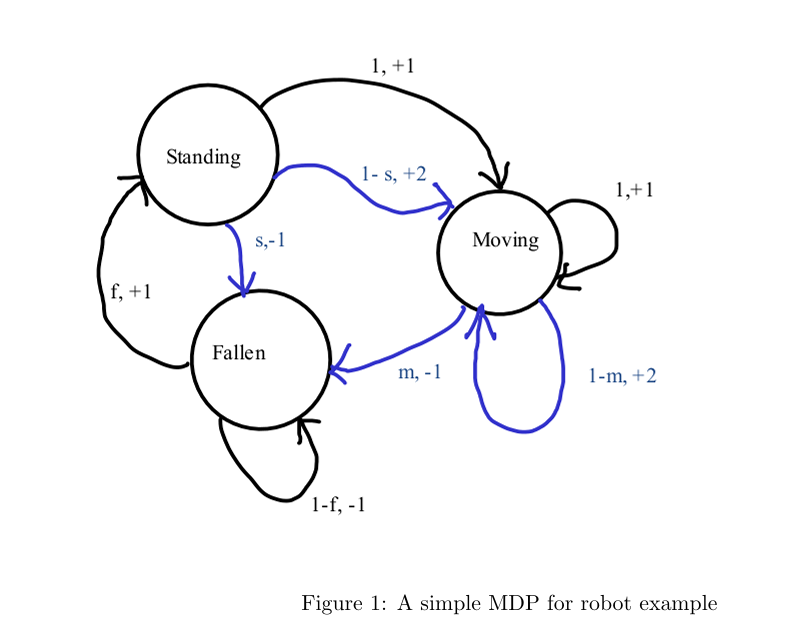

In [ ]:
# Setting the transition probabilities and rewards with the actual values
P = np.zeros((3, 2, 3)) # Transition matrix
R = np.zeros((3, 2, 3)) # Rewards Matrix

#Convention:
  # First column  :State of matrix    {0:'Fallen state',1:'Standing',2:'Moving'}
  # Second column :Action of matrix   {0:'slow',1:'fast'}
  # Third column  :transiton step

States=['Fallen','Standing','Moving']
Action=['slow','fast']
# as per above figure
# Fallen State
P[0, 0, 1] = f  # Slow: Fallen to Standing
P[0, 0, 0] = 1 - f  # Slow: Fallen to Fallen
R[0, 0, 1] = 1  # Reward for Standing up
R[0, 0, 0] = -1  # Penalty for falling

# Standing State
P[1, 0, 2] = 1  # Slow: Standing to Moving
P[1, 1, 2] = 1 - s  # Fast: Standing to Moving
P[1, 1, 0] = s  # Fast: Standing to Fallen
R[1, 0, 2] = 1  # Reward for Moving
R[1, 1, 2] = 2  # Reward for Moving aggressively
R[1, 1, 0] = -1  # Penalty for falling

# Moving State
P[2, 0, 2] = 1  # Slow: Moving to Moving
P[2, 1, 2] = 1 - m  # Fast: Moving to Moving
P[2, 1, 0] = m  # Fast: Moving to Fallen
R[2, 0, 2] = 1  # Reward for Moving
R[2, 1, 2] = 2  # Reward for Moving aggressively
R[2, 1, 0] = -1  # Penalty for falling


##Question 01
Find the optimal value function for the above MDP using value iteration by implementing the same
in python (5 points).

In [ ]:
# Running Value Iteration with the starting zero values and 1e-6 threshold for convergence
V = np.zeros(3)  # Initial value function
theta = 1e-6  # Threshold for convergence
delta = theta + 1  # Difference between old and new values (initialize to ensure at least one iteration)

while delta > theta:
    delta = 0
    for state in range(3):
        v = V[state]  # Save the current value of the state
        V[state] = max(sum(P[state, action, next_state] * (R[state, action, next_state] + gamma * V[next_state])
                           for next_state in range(3)) for action in range(2))
        delta = max(delta, abs(v - V[state]))  # Update delta

print("Optimum value of states:\n")
for i in range(len(V)):
  print(f"{States[i]} : {round(V[i],2)}")

Optimum value of states:

Fallen : 40.06
Standing : 44.1
Moving : 44.1


In [ ]:
V = np.zeros(3)  # Initial value function
theta = 1e-6  # Threshold for convergence  # Difference between old and new values (initialize to ensure at least one iteration)

while True:
    delta = 0
    v = V.copy()
    for state in range(3):
         # Save the current value of the state
        V[state] = max(sum(P[state, action, next_state] * (R[state, action, next_state] + gamma * V[next_state])
                           for next_state in range(3)) for action in range(2))
    delta = max([abs(v[state] - V[state]) for state in range(3)])
    if delta <theta:
      break

In [ ]:
V

array([40.06443645, 44.10407471, 44.10407471])

##Question 02
Find the optimal action value function $Q^*(s,a) ∀ s ∈ S, a ∈ A$ using part 1. (2 points).

In [ ]:
def calculate_Q_value(V,P,R,gamma):
  Q = np.zeros((3, 2))  # Initial action-value function


  # Calculate Q* using the optimal value function V*
  for state in range(3):
      for action in range(2):
          Q[state, action] = sum(P[state, action, next_state] * (R[state, action, next_state] + gamma * V[next_state])
                               for next_state in range(3))
  return Q

Q=calculate_Q_value(V,P,R,gamma)
print('Q action-value: \n')
for i in range(len(States)):
  print(f"{States[i]}")
  for j in range(len(Action)):
    print(f"\t\tAction: {Action[j]}, Value:{round(Q[i,j],2)}")

Q action-value: 

Fallen
		Action: slow, Value:40.06
		Action: fast, Value:0.0
Standing
		Action: slow, Value:44.1
		Action: fast, Value:43.42
Moving
		Action: slow, Value:44.1
		Action: fast, Value:42.68


##Question 03
Find the optimal policy $π^∗$ using part 2 (1 points).

In [ ]:
for i in range(len(States)):
  print(f"States:{States[i]}\taction:{Action[np.argmax(Q[i])]}")

States:Fallen	action:slow
States:Standing	action:slow
States:Moving	action:slow


##Question 04
Again find optimal value function ${V}^*(s)$ $∀ s ∈ S$ using part 3 and Bellman’s equations (2 points).

In [ ]:
from sympy import symbols, Eq, solve

# Define symbolic variables
Vs1, Vs2, Vs3 = symbols('V(standing) V(moving) V(fallen)')


# For given state [standing,moving,fallen]  and following policy (BBB):
# after simplifying bellman equation:

# Vs1=1*(1+gamma*Vs2)
# Vs2=1*(1+gamma*Vs2)
# Vs3=(1-f)*(-1+gamma*Vs3)+f*(1+gamma*Vs1)

# Define the system of linear equations
eq1 = Eq(Vs1,1*(1+gamma*Vs2))
eq2 = Eq(Vs2,1*(1+gamma*Vs2))
eq3 = Eq(Vs3,(1-f)*(-1+gamma*Vs3)+f*(1+gamma*Vs1))

# Solve the system of equations
solution = solve((eq1, eq2, eq3), (Vs1, Vs2, Vs3))

# Print the solution
for state,value in solution.items():
  print(f"{state}: {round(value,2)}")



V(fallen): 40.06
V(moving): 44.10
V(standing): 44.10


##Question 05

Use linear programming approach to obtain ${V}^∗(s)$  $∀ s ∈ S$. You can use google-or tools for solving
 LP.

**Google OR tools**

In [ ]:
# install OR tools
!pip install ortools

# import necessary packages
from ortools.linear_solver import pywraplp

#create the linear solver with the GLOP backend
solver=pywraplp.Solver.CreateSolver('glop')

# create the variable Vs1 , Vs2 and Vs3

Vs1=solver.NumVar(0,solver.infinity(),'V(standing)')
Vs2=solver.NumVar(0,solver.infinity(),'V(moving)')
Vs3=solver.NumVar(0,solver.infinity(),'V(fallen)')

#Adding constaints:
solver.Add(Vs1 - Vs2 * gamma >= 1)
solver.Add(Vs1 - (1 - s) * (2 + Vs2 * gamma) - s * (-1 + Vs3 * gamma) >= 0)
solver.Add(Vs2 - Vs2 * gamma >= 1)
solver.Add(Vs2 - (1 - m) * (2 + Vs2 * gamma) - m * (-1 + Vs3 * gamma) >= 0)
solver.Add(Vs3 - f * (1 + Vs1 * gamma) - (1 - f) * (-1 + Vs3 * gamma) >= 0)


# Adding Objective
solver.Minimize(Vs1+Vs2+Vs3)

#Calling solver
results=solver.Solve()

#To check if the optimal is found
#and printing the optimal objective value

if results==pywraplp.Solver.OPTIMAL:
  print("\nObjective Value:",round(solver.Objective().Value(),3))
  print("V(Standing): ",round(Vs1.solution_value(),2))
  print("V(Moving):   ",round(Vs2.solution_value(),2))
  print("V(Fallen):   ",round(Vs3.solution_value(),2))




Objective Value: 128.273
V(Standing):  44.1
V(Moving):    44.1
V(Fallen):    40.06


##Question 06.
Use the following two policy improvement approaches in policy iteration to find the optimal policy:

* Howards policy iteration (3 points).
* Simple policy iteration (2 points).

In [ ]:
def calculate_value_function(policy, P, R, gamma):
    """
    Calculate the value function V(s) for all states s under a given policy.

    :param policy: A list or array indicating the action chosen by the policy for each state.
    :param P: Transition probabilities.
    :param R: Rewards.
    :param gamma: Discount factor.
    :return: The value function V(s) for all states s.
    """
    # Initialize the value function V for all states to zero
    V = np.zeros(len(policy))

    # Define a threshold for determining convergence of V
    theta = 1e-6
    delta = 1  # Initialize delta to enter the loop

    while delta > theta:
        delta = 0
        for s in range(len(policy)):
            v = V[s]  # Store the current value of V(s)
            action = policy[s]  # Action chosen by the policy for state s
            # Update V(s) based on the Bellman equation for the given policy
            V[s] = sum(P[s, action, s_prime] * (R[s, action, s_prime] + gamma * V[s_prime]) for s_prime in range(3))
            # Calculate the maximum change in the value function across all states
            delta = max(delta, abs(v - V[s]))

    return V

In [ ]:
def iteration_(policy):
  # computing V(s) for all states for the given policy using bellman's equations
  V = np.around(calculate_value_function(policy, P, R, gamma),4)

  # storing solution of bellman's equations in a dictionary
  # value_function = {}
  # for state,value in values.items():
  #   value_function[str(state)] = value

  # Vs = [value_function['standing'], value_function['fallen'], value_function['moving']] # array containing value function for each state

  # finding Q(s,a) from V(s)
  Q_s_a = np.around(calculate_Q_value(V,P,R,gamma),4)

  # improvable actions for each state
  IA = [0,0,0]
  for i in range(3):
    Q_s = Q_s_a[i]
    IA[i] = list(Q_s > V[i])

  # improvable states for the policy
  IS = [i for i in range(3) if (True in IA[i])]
  return IS

**Howards policy iteration**

In [ ]:
def howard_iteration(IS, policy):
  policy_new = policy.copy()
  for state in range(3):
    if state in IS:
      policy_new[state] = 1 - policy[state]

  return policy_new




###----------Execution-------------###

#Assigning random policy
policy = np.random.randint(0, 2, size=3)
iter=0
IS=iteration_(policy)

policy_new=policy.copy()
if len(IS)!=0:
  while(len(IS)!=0):
    policy_new=howard_iteration(IS,policy)
    IS=iteration_(policy_new)

    iter+=1

print("Howard's Policy Iteration:")
print(f'Optimal policy : {policy_new}')
print(f'Steps taken: {iter}')



Howard's Policy Iteration:
Optimal policy : [0 0 0]
Steps taken: 1


**Simple policy iteration**

In [ ]:
def simple_iteration(IS, policy):
  highest_index = max(IS)
  policy_new = policy
  policy_new[highest_index] = 1-policy[highest_index]
  return policy_new





###----------Execution-------------###

#Assigning random policy
policy = np.random.randint(0, 2, size=3)
iter=0
IS=iteration_(policy)
policy_new=policy.copy()
if len(IS)!=0:
  while(len(IS)!=0):
    policy_new=simple_iteration(IS,policy)
    IS=iteration_(policy_new)

    iter+=1
print("Simple Policy Iteration:")
print(f'Optimal policy : {policy_new}')
print(f'Steps taken: {iter}')


Simple Policy Iteration:
Optimal policy : [0 0 0]
Steps taken: 2
